# Eksempelkode - Fourieranalyse

Denne eksempel-koden går ut på å bruke Fourier-analyse til å utforske et fenomen. Man kan undersøke veldig mye forskjellig ved hjelp av fourieranalyse. Her er noen eksempler: 

- Lydopptak
    - Instrument
    - Støy
- Måling av periodiske bevegelser i tid
    - Solstorm
    - Lufttrykk (meterologisk institutt har masse værdata man kan laste ned)
    - Høyvann-lavvann
- Måling av periodiske systemer i posisjon

I akkurat dette eksempelet skal vi vise hvordan man kan bruke Fourieranalyse til å undersøke periodisiteten til atomer i et materiale. 

## Litt teori som bakgrunn for eksempelet

Diffraksjon (se kapittel 13) kan brukes for å studere strukturen til materialer på atomnivå. Dette gjøres ved å sende elektroner eller røntgenstråler inn mot et materiale for og så måle det resulterende diffraksjonsmønsteret. Da strålingskildene her er «langt fra» materialet vi studerer kan den innkommende strålingen beskrives som en planbølge.

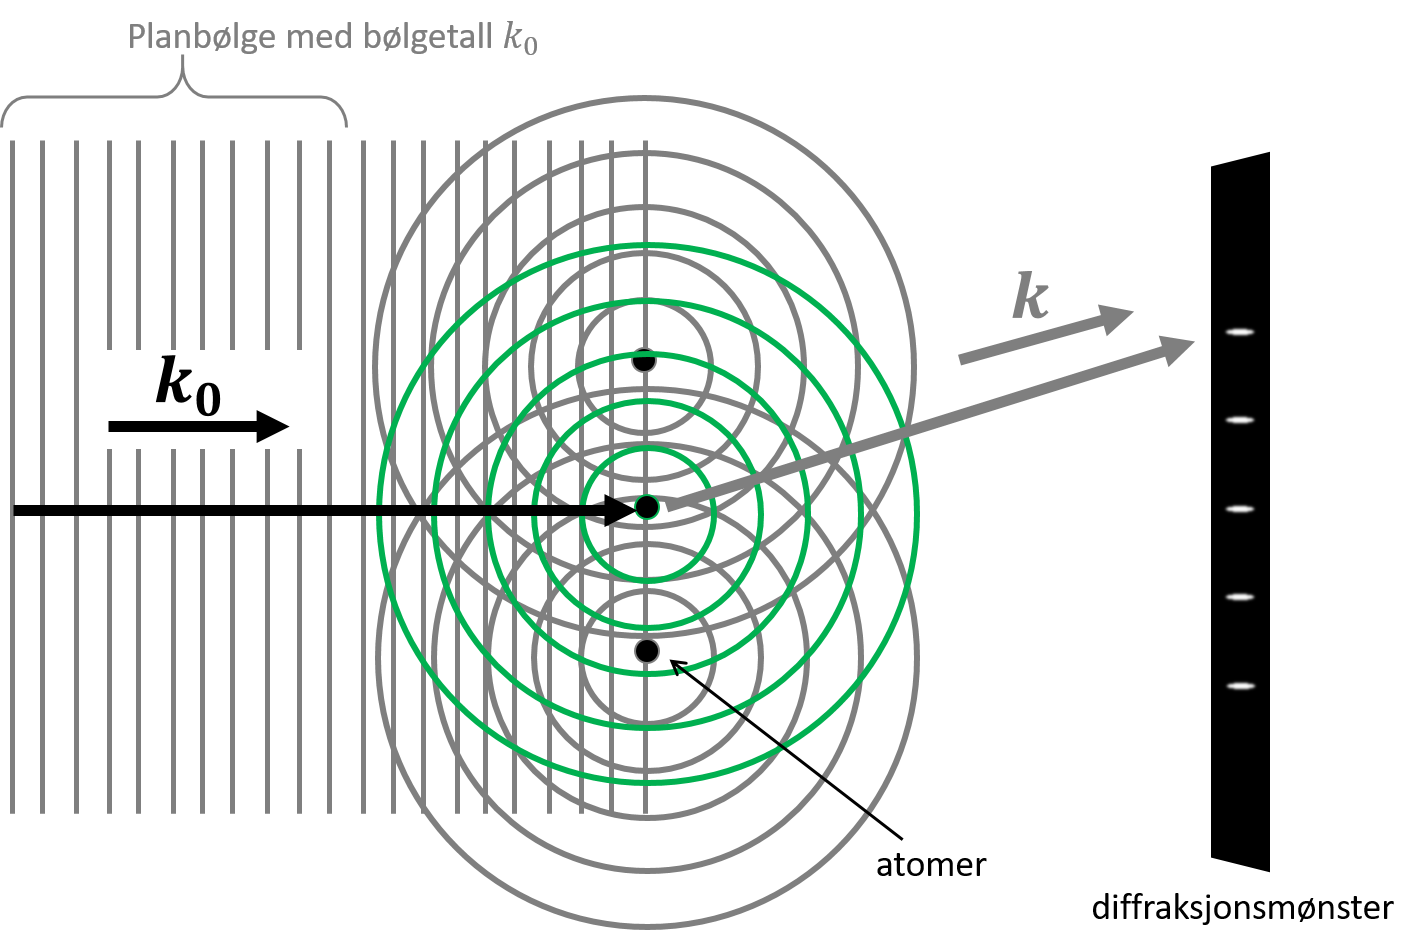

En måte å tenke på her er at hvert atom oppfører seg analogt med en spalte, dvs. hvert atom skaper en «ny bølge» og disse «nye bølgene» fra alle atomene resulterer i et interferensmønster/diffraksjonsmønster. Det vil si at for visse verdier av $k$, så får vi konstruktiv interferens og for andre verdier av $k$ får vi destruktiv interferens. 

I et vanlig materiale er det et stort antall atomer, så vi får et interferensmønster analogt med å ha et stort antall spalter. Når lys går gjennom splater er det spaltenes avstand og vidde som påvirker hvordan diffraksjonsmønsteret ser ut, men når røntgenstråler eller elektroner går gjennom et materiale er det antall atomer, type grunnnstoff og avtandene mellom dem (bindingslengdene) som avgjør hvordan diffraksjonsmønsteret blir seende ut. 
 
I elektron- og røntgendiffraksjon er detektoren plassert «langt unna» materialet, så prosessen kan beskrives som [Fraunhoferdiffraksjon](http://www.rodenburg.org/theory/y1200.html). Det viser seg at Fraunhoferdiffraksjon igjen kan beskrives som en [Fouriertransformasjon](https://www2.physics.ox.ac.uk/sites/default/files/optics-yr2-7-8.pdf) av amplitudefunksjonen som forlater spaltene eller atomene som forårsaket diffraksjonen. I dette eksempelet bruker vi derfor en Fouriertransformasjon for å evaluere hvordan vi, på basis av pensum i dette emnet, kan forvente at forskjellige atomære strukturer vil påvirke det resulterende diffraksjonsmønsteret. Vi ser videre på hvordan vi kan «gå den andre veien» altså å studere hvordan en Fouriertransformasjoner kan brukes for å studere strukturen til et materiale avbildet med atomoppløsning i et elektronmikroskop.  



Vi trenger noen pakker til å gjøre beregninger, plotte og vise bilder i notebooken.

In [1]:
import matplotlib.image as image
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft
import scipy.signal

from IPython.display import Image
from IPython.core.display import HTML

plt.rcParams.update({'font.size': 16})

## Forenklet signal

Først skal vi finne ut om metoden vår fungerer ved å ta utgangspunkt i et forenklet signal. Da lager vi en array hvor vi representerer et atom som en spiss gaussisk funksjon og plasserer ut et atom per 0.23 nm. Denne arrayen er da amplitudefunksjonen som forlater atomene, som beskrevet ovenfor. Videre gjør vi en fft av arrayen og ser hva vi får. 

Frekvensen til atomene: 4.3478260869565215 1/nm

Frekvensen til toppene i FFT av signalet:
Topp 1 : 4.3478260869565215 1/nm
Topp 2 : 8.695652173913043 1/nm
Topp 3 : 13.043478260869565 1/nm
Topp 4 : 17.391304347826086 1/nm


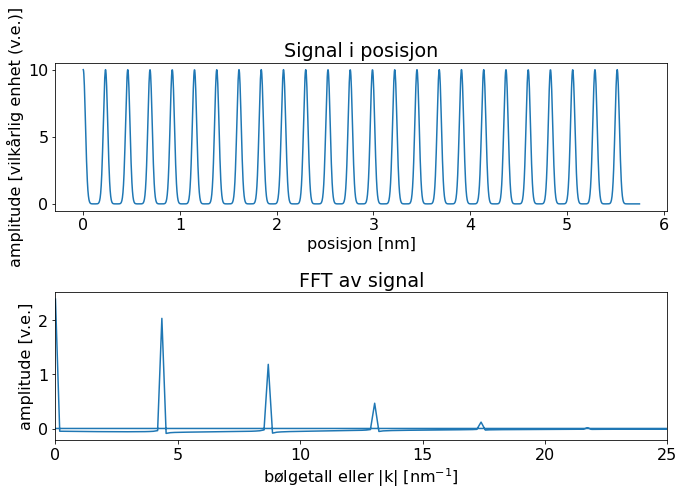

In [12]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 7))

# gaussisk funksjon som beskriver atom
def atom(x, x0):
    return 10*np.exp(-(x-x0)**2/0.001)

# signal parametre
number_of_atoms = 25
distance_between = 0.23

# samplings parametre
N_per = 2
X = number_of_atoms*distance_between # total samplingsavstand
N = 2**11
dx = X/N
f_samp = 1/dx
print("Frekvensen til atomene:", number_of_atoms/(number_of_atoms*distance_between), "1/nm")

x = np.linspace(0,number_of_atoms*distance_between, N)
array_of_atoms = np.zeros(len(x))  

for i in range(number_of_atoms):
    array_of_atoms += atom(x, distance_between*i)

# Plot av signal
ax[0].plot(x,array_of_atoms)
ax[0].set_title("Signal i posisjon")
ax[0].set_xlabel("posisjon [nm]")
ax[0].set_ylabel("amplitude [vilkårlig enhet (v.e.)]")
# calc DFT via FFT
transform = np.fft.fft(array_of_atoms)*(1/N)
freq_correct = np.fft.fftfreq(N, dx)

# Plot av FFT
ax[1].plot(freq_correct, np.imag(transform)+ np.real(transform))
ax[1].set_xlim(0,25)
ax[1].set_title("FFT av signal")
ax[1].set_xlabel("bølgetall eller |k| [nm$^{-1}$]")
ax[1].set_ylabel("amplitude [v.e.]")

# Utskrift av frekvensene
peaks = scipy.signal.find_peaks(np.real(transform)+np.imag(transform))[0]

print("\nFrekvensen til toppene i FFT av signalet:")
for j in range(4):
    print("Topp", j+1, ":", freq_correct[peaks[j]], "1/nm")
fig.tight_layout()

Vi ser at FFTen av signalet viser riktig frekens for atomenes plassering. Hvis vi kun hadde FFTen av signalet, kunne vi altså sagt noe om avstanden mellom atomene.

Vi kan bruke det forenklede signalet til å undersøke hvordan FFT-en vil forandre seg hvis vi endrer signalet. Et type endring vi kan undersøke med FFT er å bruke to ulike atomer, i stedet for samme atom. Vi modellerer det ved å ha ulik amplitude på den gaussiske kurven.

Text(0, 0.5, 'amplitude [v.e.]')

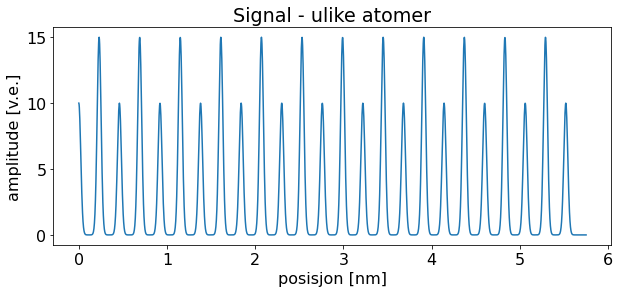

In [3]:
fig, ax = plt.subplots(figsize=(10,4))

x = np.linspace(0,number_of_atoms*distance_between, N)
array_of_atoms = np.zeros(len(x))  

amplitude = np.ones(len(x))

amplitude[1::2] = 1.5

for i in range(number_of_atoms):
    array_of_atoms += amplitude[i]*atom(x, distance_between*i)
    
ax.plot(x,array_of_atoms)
ax.set_title("Signal - ulike atomer")
ax.set_xlabel("posisjon [nm]")
ax.set_ylabel("amplitude [v.e.]")

Vi kan også gjøre andre endringer som 
- å endre avstanden mellom noen av atomene
- å legge til defekter (substitutionelt atom, vakans, interstitielt atom, grenseflater, etc)

Vi overlater FFT-en av disse forslagene til dere. 

## Ekte signal

Vi skal nå ta utsnitt av et høyoppløst bilde målt ved transmisjon elektron mikroskop, gjøre fourieranalyse av bildet og sammenligne det med diffraksjonsmønsteret til det samme materialet. Under er et bilde av materialet ZnO. Det er hentet fra [ref] (http://www.microscopy.cz/html/2487.html). Vi skal ta et utsnitt av bildet for å lage en input array til fft-funksjonen. Utsnittet er markert med et gult kvaderat. 

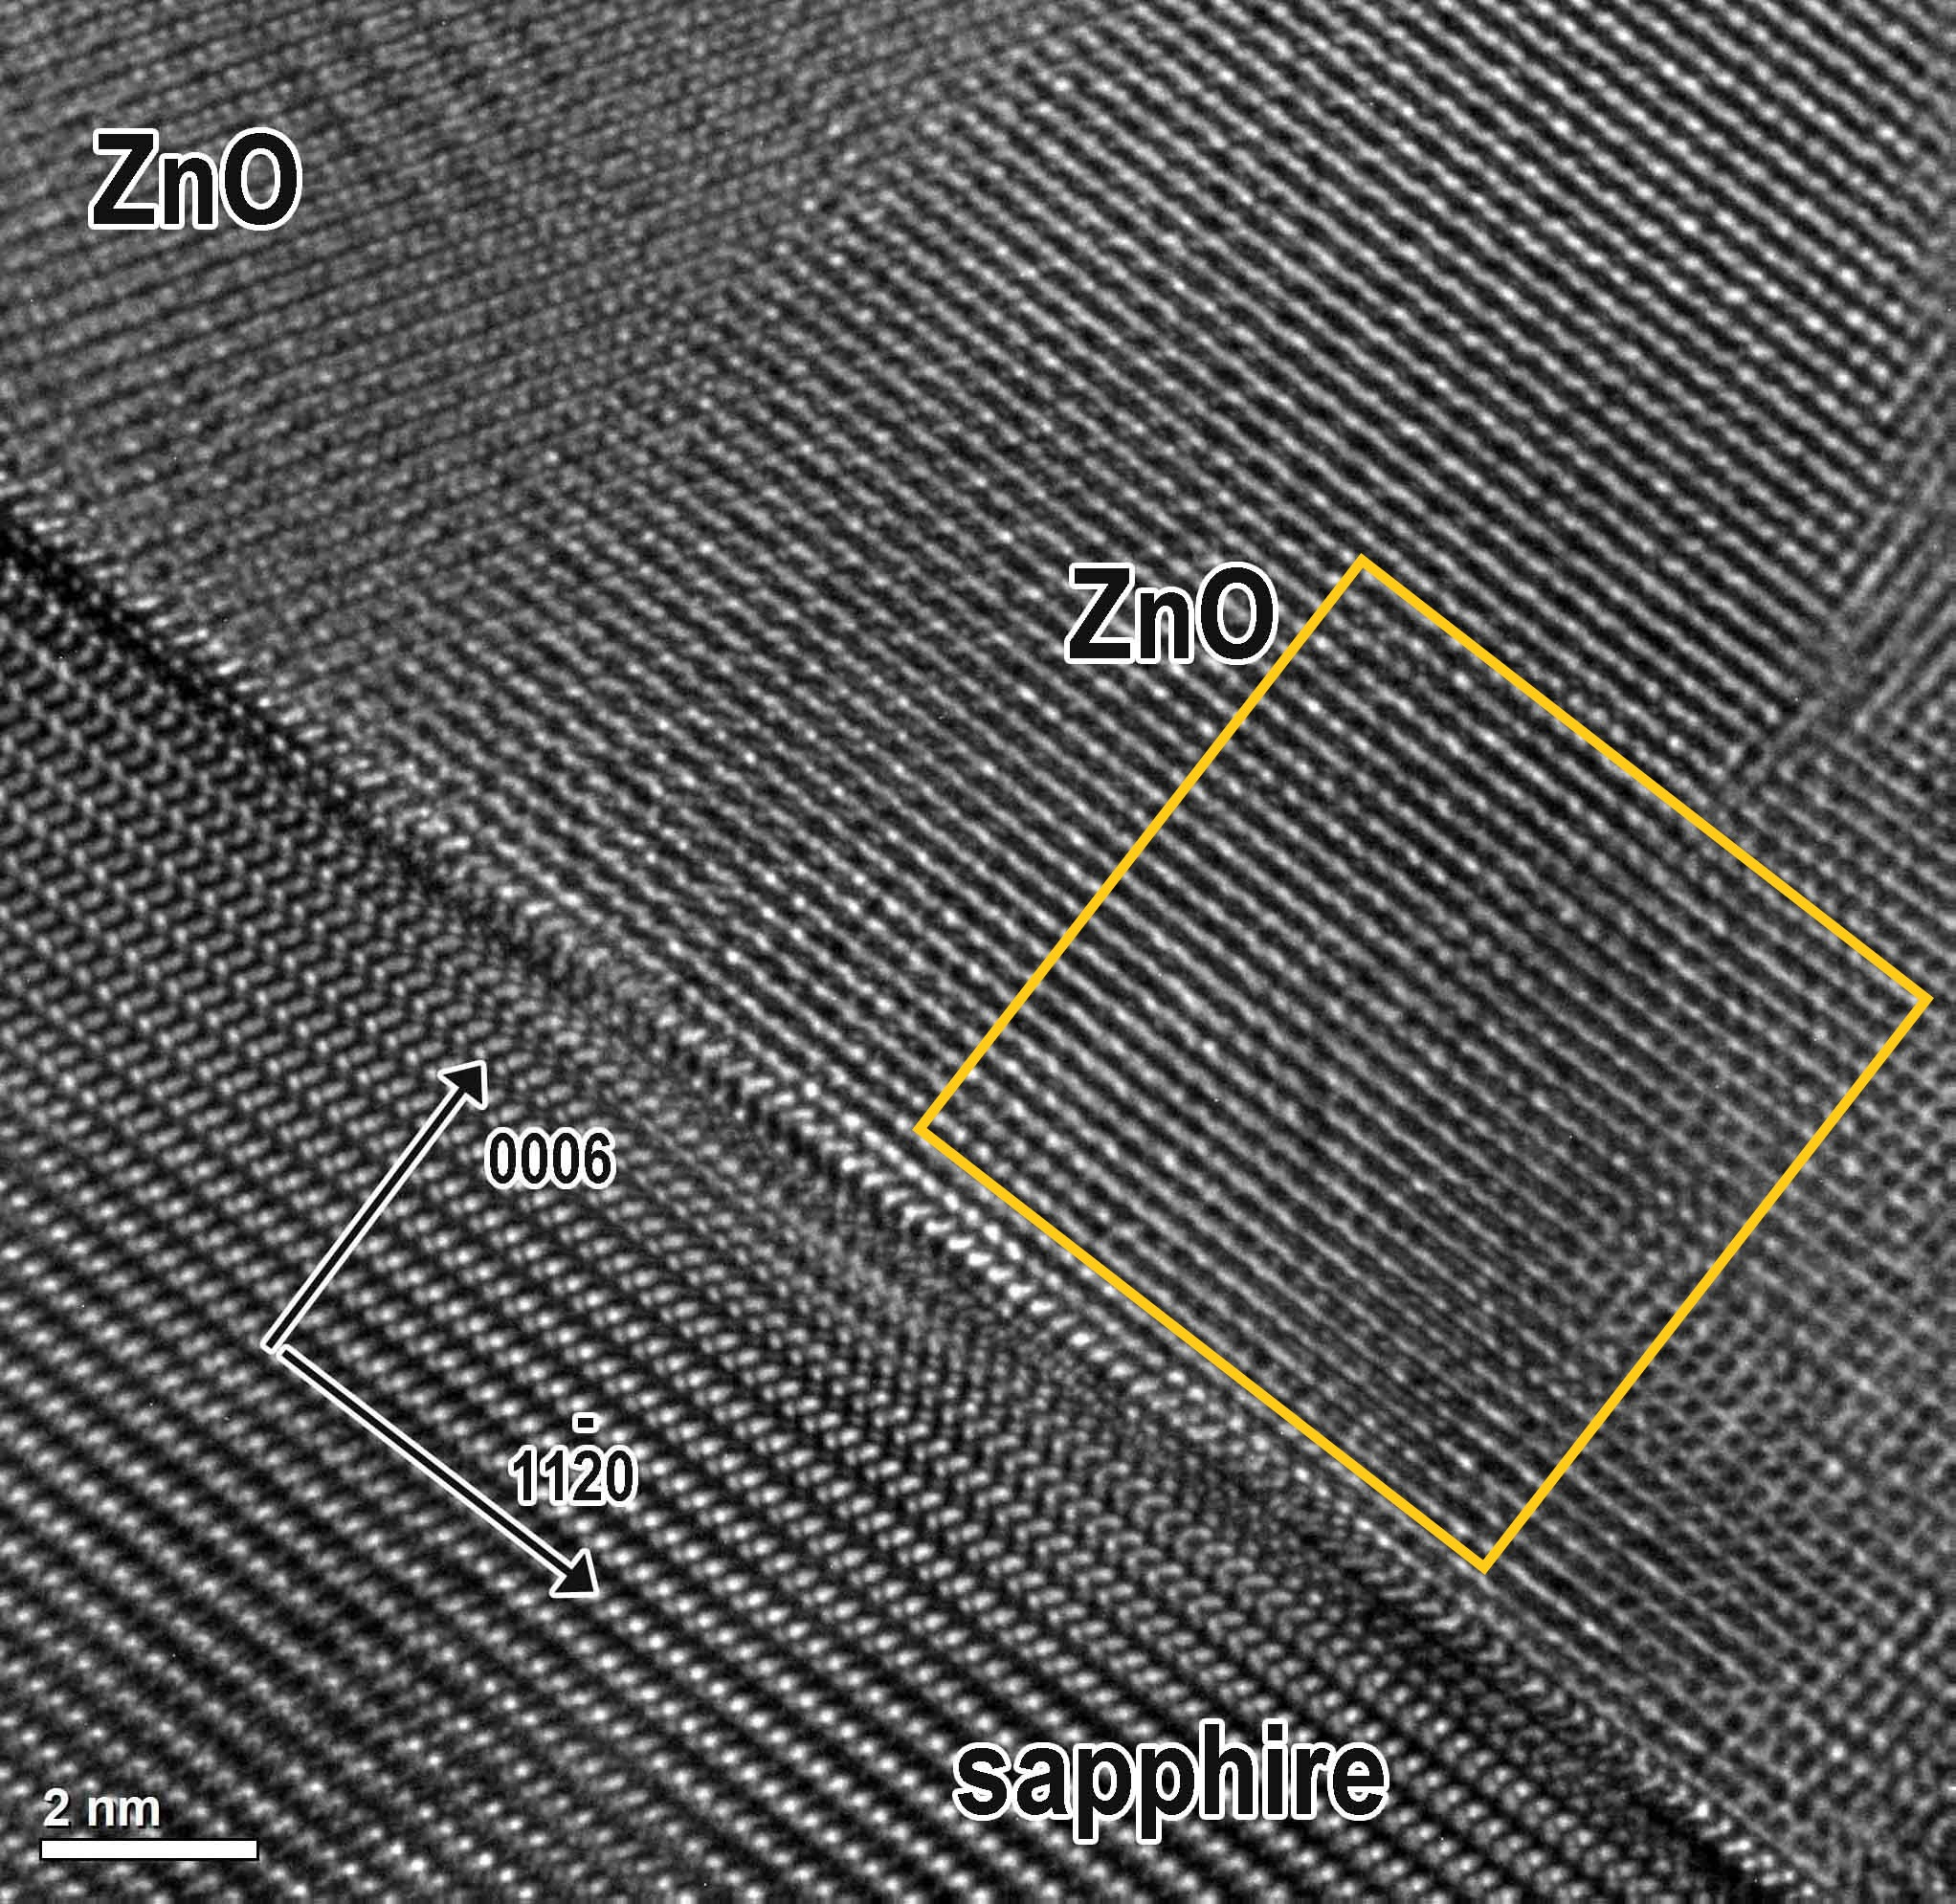

Under er et utsnitt av bildet hvor de ulike atomkollonene er opplinjert til aksene i bildet. Vi laster inn bildet ved hjelp av imreadfunksjonen. 

Det neste vi gjør er å finne gjennomsnittet til intensiteten (dette reduserer støy og gjør at toppene kommer tydeligere frem) i bildet i ulike retninger. Da vil ulike periodisiteter komme frem og vi får en arrray vi man gi som input til fft-funksjonen. 

(0.0, 774.0, 0.0, 774.0)

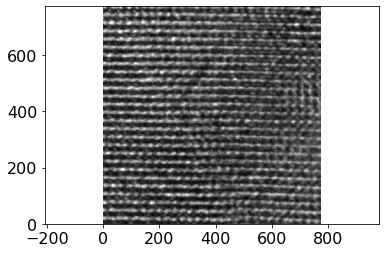

In [5]:
img=image.imread('zno.jpg')

mean_img = np.mean(img[:,:,:], axis=2)
plt.pcolor(mean_img, cmap="gray")
plt.axis('equal')

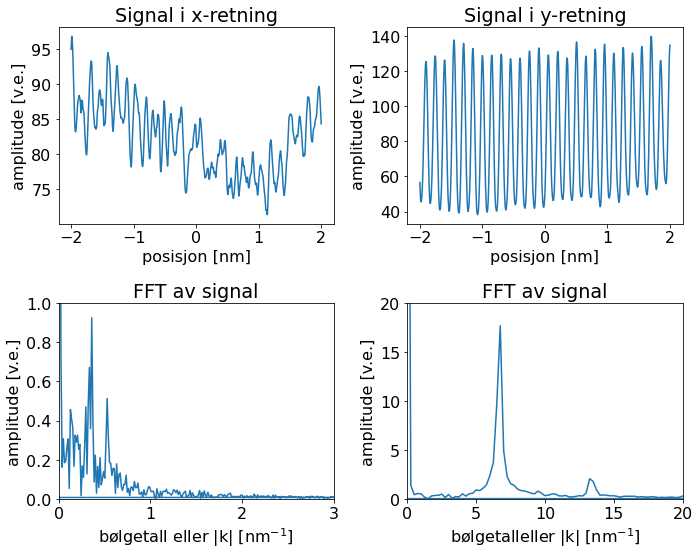

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

L = 4 # nm (målt fra bilde)
signal = np.mean(mean_img[:,:],axis=0)
N = len(signal)
dx = L/40
ax[0,0].plot(np.linspace(-L/2, L/2,len(signal)), signal)
ax[0,0].set_title("Signal i x-retning")
ax[0,0].set_xlabel("posisjon [nm]")
ax[0,0].set_ylabel("amplitude [v.e.]")

transform = np.fft.fft(signal)*(1/N)
freq_correct = np.fft.fftfreq(N, dx)

ax[1,0].plot(freq_correct, abs(transform))
ax[1,0].set_xlim([0,3])
ax[1,0].set_ylim([0,1])
ax[1,0].set_title("FFT av signal")
ax[1,0].set_xlabel("bølgetall eller |k| [nm$^{-1}$]")
ax[1,0].set_ylabel("amplitude [v.e.]")

# ----------------------------------

signal = np.mean(mean_img[:,:],axis=1)
N = len(signal)
dx = L/N

ax[0,1].plot(np.linspace(-L/2, L/2, len(signal)), signal)
ax[0,1].set_title("Signal i y-retning")
ax[0,1].set_xlabel("posisjon [nm]")
ax[0,1].set_ylabel("amplitude [v.e.]")

transform = np.fft.fft(signal)*(1/N)
freq_correct = np.fft.fftfreq(N, dx)

ax[1,1].plot(freq_correct, abs(transform))
ax[1,1].set_xlim([0,20])
ax[1,1].set_ylim([0,20])
ax[1,1].set_title("FFT av signal")
ax[1,1].set_xlabel("bølgetalleller |k| [nm$^{-1}$]")
ax[1,1].set_ylabel("amplitude [v.e.]")
fig.tight_layout()

Til slutt ser vi hvordan vi kan plukke ut deler av frekvensspekteret, gjøre invers fouriertransformasjon av det og så plotte det konstruerte signalet vi får. Dette kan være en måte å analysere hva de ulike delene av fourierspekteret representerer i det reelle rommet, og blir en måte å implementere et "low pass/high pass"-filter på. 

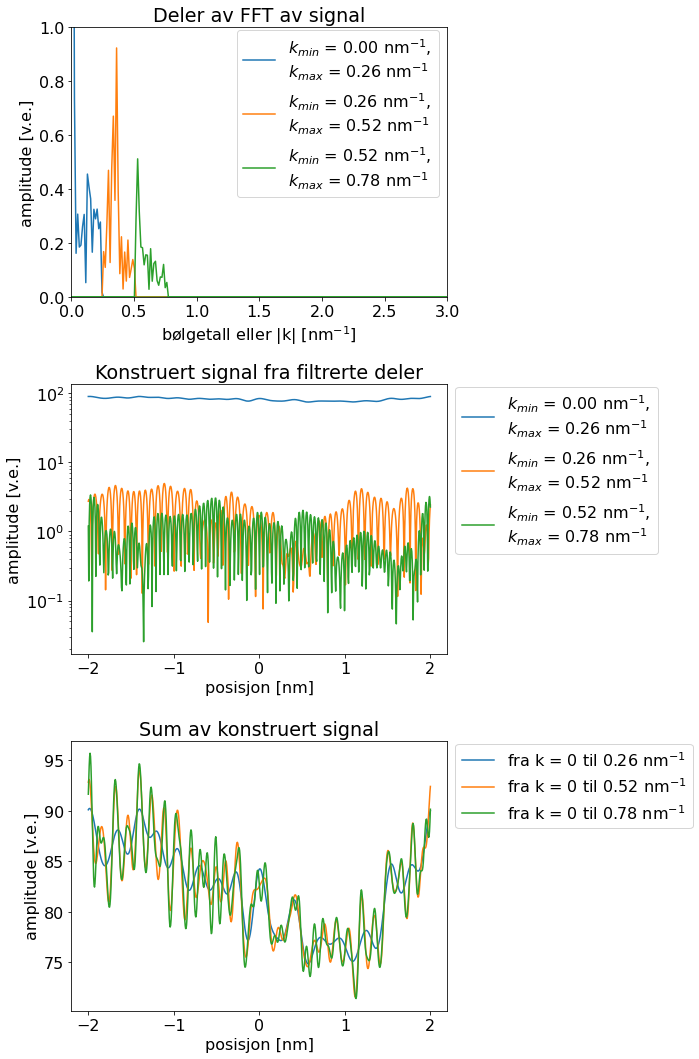

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

# Signal og FFT i x-retning

L = 4
signal = np.mean(mean_img[:,:],axis=0)
N = len(signal)
dx = L/40
transform = np.fft.fft(signal)*(1/N)
freq_correct = np.fft.fftfreq(N, dx)

# -----------------------------------------------

new_transform = np.zeros(len(transform), dtype=np.complex)
new_signal = np.zeros(len(transform), dtype=np.complex)
name_signal = []
for numb in [0, 20, 40]:

    new_transform = transform.copy()
    
    # plukker ut deler av frekvensspekteret dvs 20 punkter fra numb ved å sette det andre lik 0.
    # setter fra numb+20 til N-numb-20 til 0
    new_transform[numb+20:N-numb-20] = np.zeros(N-20*2-numb*2, dtype=np.complex)
    # setter fra start til numb lik 0
    new_transform[:numb] = np.zeros(numb, dtype=np.complex)
    # setter fra N-numb til slutten lik null
    new_transform[N-numb:] = np.zeros(numb, dtype=np.complex)
    
    ax[0].plot(freq_correct, abs(new_transform), label="$k_{min}$ = %.2f nm$^{-1}$, \n$k_{max}$ = %.2f nm$^{-1}$"%(freq_correct[numb],freq_correct[numb+20]))

    new_signal += np.fft.ifft(new_transform)*N
    
    ax[1].semilogy(np.linspace(-L/2, L/2,len(np.fft.ifft(new_transform)*N)), abs(np.fft.ifft(new_transform)*N), label="$k_{min}$ = %.2f nm$^{-1}$, \n$k_{max}$ = %.2f nm$^{-1}$"%(freq_correct[numb],freq_correct[numb+20]))
    ax[2].plot(np.linspace(-L/2, L/2,len(new_signal)), abs(new_signal), label = "fra k = 0 til %.2f nm$^{-1}$"%freq_correct[numb+20])

ax[2].set_title("Sum av konstruert signal")
ax[2].set_xlabel("posisjon [nm]")
ax[2].set_ylabel("amplitude [v.e.]")

ax[1].set_xlabel("posisjon [nm]")
ax[1].set_title("Konstruert signal fra filtrerte deler")
ax[1].set_ylabel("amplitude [v.e.]")

ax[0].set_xlim([0,3])
ax[0].set_ylim([0,1])
ax[0].set_title("Deler av FFT av signal")
ax[0].set_xlabel("bølgetall eller |k| [nm$^{-1}$]")
ax[0].set_ylabel("amplitude [v.e.]")

ax[0].legend(bbox_to_anchor=[1,1.02])
ax[1].legend(bbox_to_anchor=[1,1.02])
ax[2].legend(bbox_to_anchor=[1,1.02])
fig.tight_layout()


Denne typen analyse kan brukes til "det meste" av periodiske systemer. Det betyr at man kan undersøke andre fenomener enn atomer som er periodiske i rom i stedet for tid. Man kan også gjøre FFT på signal som er 2D. Det er 2D FFT  man gjør i forskning som en måte å analysere TEM-bilder på.  

Denne eksempelkoden har vist hvordan man muligens kan bygge opp et FFT-basert essay. Dette eksempelet er **ikke** et fullstending essay. Hvis man tar utgangspunkt i dette eksempelet burde man blandt annet
- formulere en problemstilling som passer temaet (dvs et spørsmål som kan besvares av resultatene)
- skrive noe om hvorfor man velger FFT-variablene som man gjør
- lage funksjoner som kan utføre kode som gjentas ofte
- finne egne TEM-bilder å analysere av materialer du er interessert i å lære mer om
- kommentere resultatene (dvs plottene)
